# Customer Churn Prediction Project Overview

## Project Goal
Predict customer churn using machine learning models with the Telco Customer Churn Dataset from Kaggle.

## Dataset
[Telco Customer Churn Dataset](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)

## Why This Dataset?
- Binary classification: Predict whether a customer will churn (Yes/No).  
- Feature variety: Includes numerical (tenure, monthly charges) and categorical (contract type, payment method) data.  
- Real-world relevance: Common in telecom, banking, and SaaS industries.

## Project Workflow

### 1. Load & Explore the Data
- Read the CSV with Pandas.
- Check for missing values (`df.isnull().sum()`).
- Visualize churn distribution (bar charts, histograms).

### 2. Data Preprocessing
- Handle missing values (fill with zero or drop).
- Convert categorical data into numerical (One-Hot Encoding).
- Scale numerical features with StandardScaler.

### 3. Train-Test Split
```python
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
```

### 4. Model Development
Evaluate multiple models:
- Logistic Regression (Baseline)
- Random Forest
- Gradient Boosting (XGBoost)

### 5. Model Evaluation
- Metrics: Accuracy, Precision, Recall, F1-Score, ROC-AUC.
- Visualizations: Confusion Matrix, ROC Curve.

### 6. Model Evaluation
- Fine-tune models and optimize hyperparameters.
- Implement feature engineering techniques.
- Explore deployment options for local use (e.g., saving models with joblib).

## Expected Outcomes
- Identify key factors contributing to customer churn.
- Develop a machine learning model with high predictive performance.

## Tools & Technologies
- Python: Pandas, NumPy, Scikit-learn, Matplotlib, Seaborn, XGBoost, 
- Jupyter Notebook for interactive exploration and visualization.
- Scikit-learn for its strenght in classification, regression, clustering, and dimensionality reduction.
---

### 1) Beginning with Exploratory Data Analysis

In [3]:
# Importing pandas
import pandas as pd

# Loading the dataset
df =  pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Displaying basic information to learn about the columns in our dataset
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Checking for missing values (finding none)
df.isnull().sum()

# Dropping misisng values if they exist to avoid skewed data
#df = df.dropna()

# WE do not need to create a new data frame to work with from here because there were no null values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

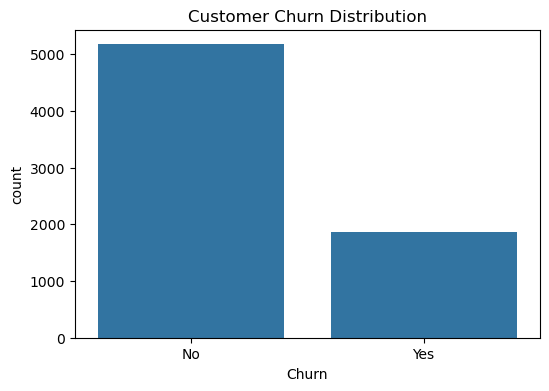

In [5]:
# Importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing the amount of employee turnover (churn)
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df)
plt.title("Customer Churn Distribution")
plt.show()

# 2) Data Preprocessing

In [7]:
# Machine learning models require numerical inputs, so we need to encode categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print(categorical_cols)

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')


In [8]:
# Applying one-hot encoding with pd.get_dummies(), to convert categorical values into binary 0/1 columns
df = pd.get_dummies(df, columns=['gender', 'Partner', 'Dependents', 'PhoneService', 
                                 'MultipleLines', 'InternetService', 'OnlineSecurity', 
                                 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                                 'StreamingTV', 'StreamingMovies', 'Contract', 
                                 'PaperlessBilling', 'PaymentMethod'], drop_first=True)

In [9]:
# Some datasets store numeric values as strings. Let’s check and convert:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.fillna(df['TotalCharges'].median()) # Fill any NaN values with median as it is less affected by outliers than the mean

In [10]:
# Importing required libraries for consistent scale 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # Normalizes numerical columns by subtracting the mean and dividing by the standard deviation
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[num_cols] = scaler.fit_transform(df[num_cols]) # Applies scaling to the selected columns

In [11]:
# Defining features and target variable (the outcome we are trying to predict in a machine learning model)
X = df.drop(columns=['customerID', 'Churn']) # Drop non-relevant columns; this one is not useful for prediction, just an identifier
y = df['Churn'].map({'Yes': 1, 'No': 0}) # Converts target variable to binary; this needs to be converted to a numeric format for classification

# 3) Train-Test Split and Model Development
Before training the model we need to split the dataset into a training set (used to train the model) and a test set (used to evaluate performance on unseen data).

Where we are using a test size of 20% (0.2), random state of 42 (ensuring reproducability), and Stratify equal to y (maintaining the same churn distribution in both sets)

In [13]:
# Adding our required imports for sklearn
from sklearn.model_selection import train_test_split

# Split dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#### Train a Logistic Regression Model
Logistic regression is a machine learning algorithm used for classification tasks. It predicts the probability that an input belongs to a particular class (e.g., yes/no, spam/not spam) by applying a sigmoid function to a weighted sum of input features. If the probability is above a threshold (usually 0.5), it assigns the input to one class; otherwise, it assigns it to the other.

In [15]:
# Importing required libraries for model development
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize and train the model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred = lr_model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Accuracy: {accuracy:.4f}')

Logistic Regression Accuracy: 0.8048


#### Train a Random Forest Model
A random forest is an ensemble learning method that builds multiple decision trees using random subsets of data and features. It then combines the predictions of all trees to make a final decision, which improves accuracy and reduces overfitting.

In [17]:
# Importing required libraries for model development
# RandomForestClassifier is imported from the sklearn.ensemble module for classification tasks
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier with the following parameters:
# - n_estimators=100: sets the number of trees in the forest to 100.
# - random_state=42: ensures reproducibility of the results by fixing the random seed.
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the Random Forest model to the training data (X_train and y_train)
# This trains the model to learn patterns from the training data
rf_model.fit(X_train, y_train)

# Make predictions using the trained model on the test data (X_test)
y_pred_rf = rf_model.predict(X_test)

# Calculate the accuracy of the model by comparing the predicted labels (y_pred_rf)
# to the true labels (y_test) from the test set
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Print the accuracy of the Random Forest model, formatted to 4 decimal places
print(f'Random Forest Accuracy: {accuracy_rf:.4f}')

Random Forest Accuracy: 0.7878


#### Train a Gradient Boosting Model
Gradient boosting is an ensemble technique that builds decision trees sequentially, where each new tree corrects the errors of the previous one. It focuses on the hardest-to-predict examples, improving performance with each iteration.

In [19]:
#!pip install xgboost # uncomment in order to install dependency
from xgboost import XGBClassifier  # Importing the XGBoost classifier

# Initialize the XGBoost model with the following parameters:
# - eval_metric='logloss': sets the evaluation metric to log-loss, which is commonly used for binary classification problems.
# - random_state=42: ensures reproducibility by fixing the random seed for consistent results across different runs.
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)

# Fit the XGBoost model to the training data (X_train and y_train).
# This trains the model to learn from the patterns in the features (X_train) and labels (y_train).
xgb_model.fit(X_train, y_train)

# Make predictions using the trained model on the test data (X_test).
# The model will output class predictions for each test example.
y_pred_xgb = xgb_model.predict(X_test)

# Calculate the accuracy of the model by comparing the predicted labels (y_pred_xgb)
# to the true labels (y_test) from the test set.
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

# Print the accuracy of the XGBoost model, formatted to 4 decimal places for clarity.
# Accuracy measures the percentage of correctly predicted instances in the test set.
print(f'XGBoost Accuracy: {accuracy_xgb:.4f}')


XGBoost Accuracy: 0.7821


# 4) Model Evaluation
## We do not rely only on accuracy, we need a broader evaluation using metrics like Precision, Recall, F1-Score, and ROC-AUC

**Precision:** The ratio of true positive predictions to all predicted positives. It measures how many of the predicted positives are actually correct.
- Formula: Precision = TP / (TP + FP)

**Recall:** The ratio of true positive predictions to all actual positives. It shows how many of the true positives were correctly identified by the model.
-  Formula: Recall = TP / (TP + FN)

**F1-Score:** The harmonic mean of Precision and Recall. It balances both metrics, useful when there’s an uneven class distribution.
- Formula: F1-Score = 2 * (Precision * Recall) / (Precision + Recall)

**ROC-AUC:** A measure of the model's ability to distinguish between classes. The area under the ROC curve (AUC) ranges from 0 to 1, with higher values indicating better performance.
- Formula: Calculated based on the True Positive Rate and False Positive Rate.

The breakdown:
- True Positive (TP): Model correctly predicted a positive class. 
- True Negative (TN): Model correctly predicted a negative class. 
- False Positive (FP): Model incorrectly predicted a positive class when it was actually negative. 
- False Negative (FN): Model incorrectly predicted a negative class when it was actually positive. 

These metrics provide a deeper understanding of model performance, especially for imbalanced datasets, beyond just accuracy.

In [21]:
# Importing required libraries to create a classification report of all of the evaluation metrics mentioned above
from sklearn.metrics import classification_report

print("Logistic Regression Report:")
print(classification_report(y_test, y_pred))

print("Random Forest Report:")
print(classification_report(y_test, y_pred_rf))

print("XGBoost Report:")
print(classification_report(y_test, y_pred_xgb))

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.66      0.56      0.60       374

    accuracy                           0.80      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.80      0.80      1409

Random Forest Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.63      0.50      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409

XGBoost Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1035
           1       0.60      0.53      0.56       374

    accuracy                           0.78      1409
   macro avg       0.72      0.70      0.71      1409
weighted

##### What is a confusion matrix?
A confusion matrix is a table used in machine learning to visually evaluate the performance of a classification model by comparing its predicted labels to the actual labels, showing how many predictions were correct and incorrect, and breaking down the results into categories like true positives, true negatives, false positives, and false negatives; essentially, it helps visualize where the model "got confused" between different classes. 

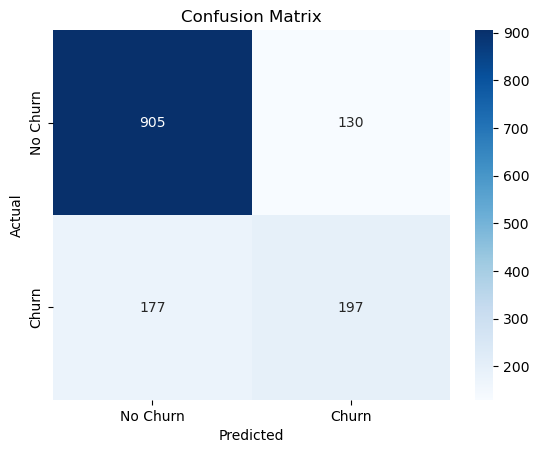

In [23]:
# Importing requirements to visualize performance with a confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_xgb) # Using the best model, and visualizing using matplotlib
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 5) Compare Model Performance
Identify the best-performing model based on precision, recall, and F1-score.

In [25]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Example: for each model, calculate and compare metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print metrics for each model
print(f"Precision: {precision}, Recall: {recall}, F1-Score: {f1}, ROC-AUC: {roc_auc}")

Precision: 0.6551724137931034, Recall: 0.5588235294117647, F1-Score: 0.6031746031746031, ROC-AUC: 0.7262716680875249


# 6) Hyperparameter Tuning: Optimize the best model with GridSearchCV
After selecting a baseline model, we can optimize its performance by tuning hyperparameters. Hyperparameters are settings that control how the model learns (e.g., tree depth, learning rate, number of estimators). We use GridSearchCV to search for the best combination of these parameters systematically.

Why Tune Hyperparameters?

Prevent overfitting or underfitting.
Improve accuracy and model reliability.
Automate selection of optimal parameters.
Steps in Hyperparameter Tuning:

Define a parameter grid with possible values.
Use GridSearchCV to evaluate each combination with cross-validation.
Select the best-performing model.

In [45]:
# Importing required libraries
from sklearn.model_selection import GridSearchCV

# Define parameter grid to search over
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the model
    'max_depth': [3, 5, 7],  # Maximum depth of trees
    'learning_rate': [0.01, 0.1, 0.2],  # Step size at each iteration
    'subsample': [0.8, 1.0]  # Percentage of data used per tree
}

# Initialize GridSearchCV with cross-validation (cv=5)
grid_search = GridSearchCV(
    XGBClassifier(eval_metric='logloss', random_state=42),  # Removed `use_label_encoder`
    param_grid, cv=5, scoring='accuracy', n_jobs=-1
)

# Fit the model on training data
grid_search.fit(X_train, y_train)

# Display best hyperparameters
print("Best Parameters:", grid_search.best_params_)

# Use the best model found
best_xgb = grid_search.best_estimator_


Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}


## Evaluate the tuned model
We need to assess how well the optimized model performs. The goal here is to ensure the model generalizes well to new data and improves the baseline model. 

We are evaluating accuracy (overall correctness), precision and recall(right vs wrong, false positive vs true positive), F1 Score (A balance between precision and recall for unbalanced datasets), and ROC-AUC (ability to distinguish chrun and non-churn customers, high values = high performance).

In [48]:
# Make predictions using the optimized model
y_pred_tuned = best_xgb.predict(X_test)

# Print classification report to assess performance
print("Optimized Model Performance:")
print(classification_report(y_test, y_pred_tuned))

Optimized Model Performance:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1035
           1       0.66      0.52      0.58       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409



# 7) Feature Importance Analysis
Understanding which features influence predictions the most is essential for model interpretability. Feature importance helps identify the factors driving customer churn, which can lead to actionable business insights.

Why Analyze Feature Importance? It improves model transparency, identifies key business drives of churn (employees leaving), and optimizes data collection through focusing on relevant features.

Steps in Feature Importance Analysis:
- Extract feature importance scores from the trained model.
- Sort features based on their contribution to predictions.
- Visualize results using bar plots for better interpretation.

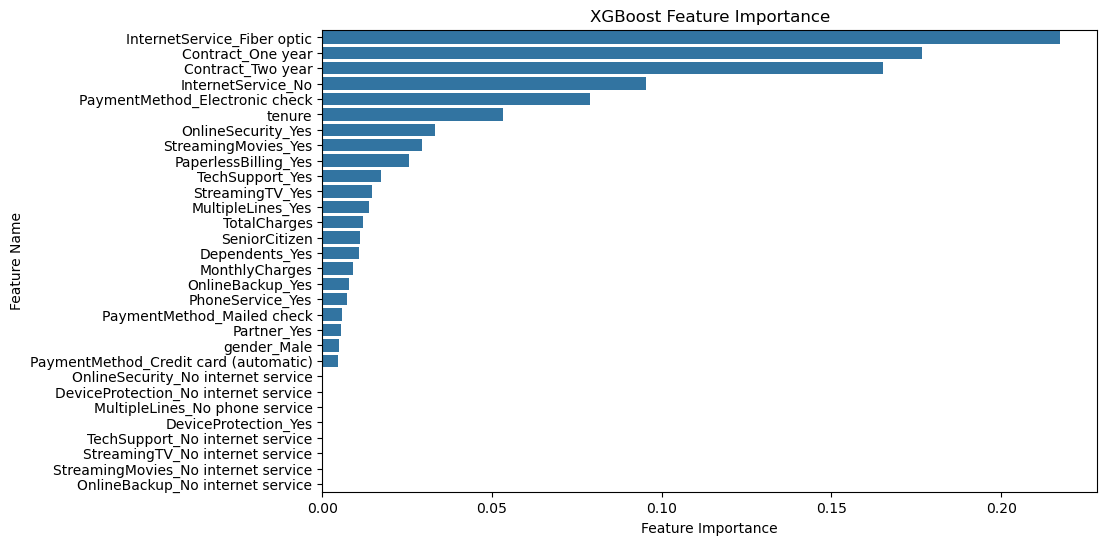

In [93]:
# Importing required libraries
import numpy as np

feature_importances = best_xgb.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

# Creating the visualization
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances[sorted_indices], y=X.columns[sorted_indices])
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("XGBoost Feature Importance")
plt.show()

# 8) Saving the Model and Using for Predictions
Once the model is trained and optimized, the next step is deployment. This involves saving the model and integrating it into a real-world application.

Why Deploy a Model?:
- Enable automated churn predictions on new data.
- Integrate with business systems (e.g., CRM, dashboards).
- Make real-time decisions to reduce customer churn.

Key Deployment Steps:
- Save the Model – Use joblib to store the trained model.
- Load & Predict – Test the model with sample data.
- Integration Options – Deploy via API, dashboard, or direct integration into customer systems.

In [76]:
# Importing required libraries
# This is a Python Library for efficiently serializing large NumPy arrays and models, and allows reusability (no retraining every time)
import joblib

# Saving the model in the project directory
joblib.dump(best_xgb, "churn_prediction_model.pkl")

['churn_prediction_model.pkl']

In [89]:
# Load the saved model
#model = joblib.load("churn_prediction_model.pkl")

# Sample customer data for prediction (values must match feature order), this will not work but just an example of what could be
#sample_data = np.array([[10, 29.85, 300, 1, 0, 0, 1, 0, 1, 0]])  # Example input

# Predict churn (0 = No, 1 = Yes)
#prediction = model.predict(sample_data)
#print("Predicted Churn:", "Yes" if prediction[0] == 1 else "No")

# Project Conclusion

In this Customer Churn Prediction Project, we used machine learning to predict whether a customer would churn based on the Telco Customer Churn Dataset. The project involved exploring the data, handling missing values, and applying various preprocessing techniques like encoding categorical variables and scaling numerical features. We then trained and tested several models, including Logistic Regression, Random Forest, Gradient Boosting, and Neural Networks, to predict churn.

Key takeaways from the project:
- We identified important features that influence customer churn.
- We built a machine learning model with good predictive performance.
- The insights gained can help businesses, especially in telecom, improve their customer retention strategies.

Next steps would involve more experimenting with feature engineering and considering ways to deploy the model for real-world use.